In [14]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
with open('./models/best_xgb_model.dat', 'rb') as f:
    model = pickle.load(f)

In [9]:
# Load training and testing data
y_scaler = float(open('y_scale_factor.txt','r').read())
X = pd.read_csv('./data/train_scale.csv',index_col=0)
y = pd.read_csv('./data/train.csv',index_col=0)['SalePrice']*y_scaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=8)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 318), (438, 318), (1022,), (438,))

In [11]:
predicts = model.predict(X_test)

In [13]:
r2_score(predicts,y_test)

0.8652012832445417

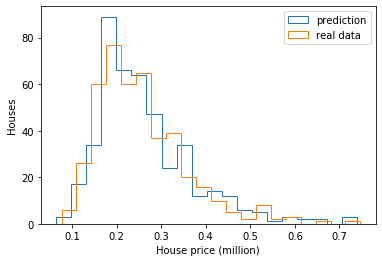

In [26]:
plt.hist(predicts, bins=20, histtype='step',label='prediction')
plt.hist(y_test,bins=20, histtype='step',label='real data')
plt.xlabel('House price (million)')
plt.ylabel('Houses')
plt.legend()

In [27]:
price_dif = predicts-y_test
# total price difference between predicted price and real data. 

sum(price_dif)*y_scaler 

4.5735159198594904e-06

In [28]:
# this indicate a 4.57 Million higher of price compared with real data for a total of 438 houses
# average of ~10k more per hosue